#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [65]:
!pip install MiniSom

## Importing the libraries


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [67]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [68]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [69]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


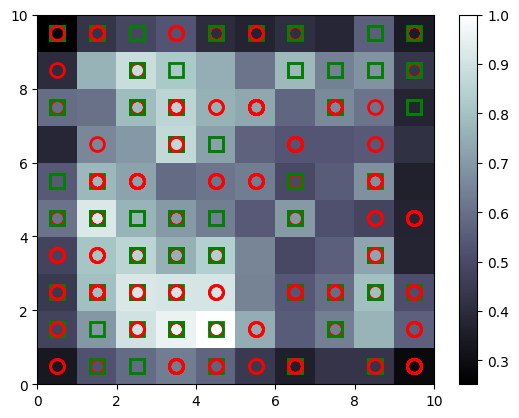

In [70]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [71]:
mappings = som.win_map(X)
fruads = np.concatenate((mappings[(2,4)], mappings[(8,8)]),axis = 0)
fruads = sc.inverse_transform(fruads)

In [72]:
fruads.shape

(4, 15)

#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [73]:
customers = dataset.iloc[:,1:].values

In [74]:
customers.shape

(690, 15)

## Create Dependent Variable

In [75]:
is_fruad = np.zeros(len(dataset)) # 690개

In [76]:
# som으로 분류한 fruad 고객 1로 바꾸기
for i in range(len(dataset)):
  if dataset.iloc[i,0] in fruads:
    is_fruad[i] = 1

#Part 3 - ANN

### Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

In [78]:
from keras.models import Sequential
from keras.layers import Dense

## Initializing the ANN

In [79]:
classifier = Sequential()

##Adding the input layer and the first hidden layer

In [80]:
classifier.add(Dense(units = 2
                     , kernel_initializer='uniform'
                     , activation='relu'
                     ,input_dim=15))

## Adding the output layer

In [81]:
classifier.add(Dense(units=1
                     , kernel_initializer='uniform'
                     , activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [82]:
classifier.compile(optimizer = 'adam'
                  , loss = 'binary_crossentropy'
                  , metrics = ['accuracy'])

## Training the ANN on the Training set

In [83]:
classifier.fit(customers, is_fruad, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 3s 3ms/step - loss: 0.4793 - accuracy: 0.9928
Epoch 2/2
690/690 [==============================] - 2s 3ms/step - loss: 0.1781 - accuracy: 0.9942


## Predicting the probalbilities of frauds

In [84]:
# 고객이 부정행위를 했을 확률
y_pred = classifier.predict(customers)


22/22 [==============================] - 0s 2ms/step


In [85]:
y_pred[:10]

array([[0.09078915],
       [0.06442168],
       [0.11418247],
       [0.05651257],
       [0.04563083],
       [0.02573025],
       [0.0757245 ],
       [0.01943097],
       [0.14504217],
       [0.0285465 ]], dtype=float32)

In [86]:
# 고객 번호 추가
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred),axis=1) # 2차원+2차원

In [87]:
# 확률 순 정렬
y_pred = y_pred[y_pred[:,1].argsort()]

In [89]:
y_pred[:10]

array([[1.57238270e+07, 1.10883266e-02],
       [1.56548590e+07, 1.44525375e-02],
       [1.57250280e+07, 1.49184046e-02],
       [1.57319890e+07, 1.51877450e-02],
       [1.56674600e+07, 1.58611927e-02],
       [1.57764940e+07, 1.64881833e-02],
       [1.57734210e+07, 1.65715907e-02],
       [1.55664950e+07, 1.72940250e-02],
       [1.55986140e+07, 1.74978133e-02],
       [1.55775150e+07, 1.83711480e-02]])